## Geopandas 

### @author: Roberto mendoza

In [434]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import fiona

import geopandas as gpd  # manejo de datos georefereciados
from geopandas import GeoSeries # series de datos georerenciados
from shapely.geometry import Point, LineString, Polygon, MultiLineString # objetos geométricos
from shapely.ops import nearest_points  # operaciones entre objetods geometricos
from pyproj import CRS, Geod # proyecciones a sistemas planares

import matplotlib.patches as mpatches
import haversine as hs # distancia de grat-cricle entre puntos
from  geopy import distance  # distancia entre puntos 
from tqdm import tqdm # contador de tiempo en un loop
from matplotlib.lines import Line2D
import pyreadstat  # import spss files
import unidecode 

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

In [435]:
# shapefile limites departamentales

dep_sh = gpd.read_file( r'../../data/geopandas_data/LIMITE_DEPARTAMENTO/LIMITE_DEP.shp' )

In [436]:
dep_sh.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 1.0 Polygonos 

In [437]:
# Load .gdb dataset.
# La particuladridad es que almacena basese de datos por capas. Podemos acceder a cada una de ellas con layer
# El layer 5 contiene el shapefile de polygono de cada distrito 

dist_mita = gpd.read_file(r'..\..\data\Mita\mita.gdb', layer=5
                         )
dist_mita

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((857190.750 8528462.000, 857160..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((808891.875 8541746.000, 808841..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((840558.000 8540224.000, 840553..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((654318.750 8525047.000, 654191..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((808891.875 8541746.000, 809037..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((1002575.875 8254569.500, 10026..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((1019870.000 8252512.000, 10200..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((762927.250 8250735.500, 763048..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((1020096.500 8222314.500, 10199..."


In [438]:
dist_mita.crs

# sistema de coordenadas proyectadas en un plano cartesiano (unidad de medida en metros) bajo el método Transverse Mercator
    # compatible para países de Argentina, Brazil, Chile, Colombia, Ecuadro y Peru

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Sistema de coordendas proyectada usada en la Mita 

[link](https://epsg.io/32718)

In [439]:
# Conversión de sistemas
# transformación: coordenadas proyectadas EPSG:32718 hacia el sistema de coordenadas estándar Mundial EPSG:4326 (WGS84)


dist_mita.to_crs(epsg=4326,inplace=True)
dist_mita

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((-71.70391 -13.28971, -71.70419..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((-72.15058 -13.17512, -72.15105..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((-71.85859 -13.18546, -71.85863..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((-73.57512 -13.33796, -73.57629..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((-72.15058 -13.17512, -72.14922..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((-70.31324 -15.73702, -70.31223..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((-70.15193 -15.75203, -70.15064..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((-72.54551 -15.80829, -72.54436..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((-70.14329 -16.02400, -70.14468..."


In [440]:
dist_mita.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [441]:
# Se retorna al sistema de coordenadas iniciales

mita_cartesiano = dist_mita.to_crs(epsg=32718)
mita_cartesiano

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((857190.750 8528462.000, 857160..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((808891.875 8541746.000, 808841..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((840558.000 8540224.000, 840553..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((654318.750 8525047.000, 654191..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((808891.875 8541746.000, 809037..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((1002575.875 8254569.500, 10026..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((1019870.000 8252512.000, 10200..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((762927.250 8250735.500, 763048..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((1020096.500 8222314.500, 10199..."


<AxesSubplot:>

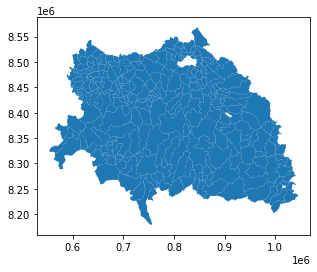

In [442]:
mita_cartesiano.plot()

## 2.0 Point

In [443]:
# Coordenadas (GPS) de la capital del distrito (zona MITA minera)

capitales = gpd.read_file(r'..\..\data\Mita\mita.gdb', layer=0
                         )
capitales 

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,geometry
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (294757.386 -1792181.957)
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (205784.825 -1773103.034)
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (40795.410 -1764692.228)
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (323049.033 -1763022.435)
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (37782.455 -1762744.137)
...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (113256.978 -1482713.773)
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (95751.710 -1481724.267)
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (79542.011 -1476838.578)
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (146821.296 -1470623.239)


In [444]:
capitales.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LAT        305 non-null    float64 
 1   LON        305 non-null    float64 
 2   UBIGEO     305 non-null    float64 
 3   NEAR_FID   305 non-null    int64   
 4   NEAR_DIST  305 non-null    float64 
 5   geometry   305 non-null    geometry
dtypes: float64(4), geometry(1), int64(1)
memory usage: 14.4 KB


In [445]:
capitales.crs

<Derived Projected CRS: PROJCS["mita_equi",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: mita_equi
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [446]:
# drop geometry colum

del capitales['geometry']

In [447]:
capitales

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST
0,-16.099444,-70.282500,210113.0,1,6.259442e+05
1,-15.928056,-71.102778,40514.0,1,7.087384e+05
2,-15.852500,-72.623889,40605.0,1,8.531851e+05
3,-15.837500,-70.021667,210101.0,1,6.231187e+05
4,-15.835000,-72.651667,40601.0,1,8.567653e+05
...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05
301,-13.310556,-72.117222,81301.0,1,9.819171e+05
302,-13.266667,-72.266667,81306.0,1,9.968202e+05
303,-13.210833,-71.646389,81103.0,1,9.549290e+05


In [448]:
# De columnas de latitud longitud al objeto geometry (Point)

capitales['Point'] = gpd.points_from_xy(capitales.LON, capitales.LAT, crs="EPSG:4326")
capitales

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,Point
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (-70.28250 -16.09944)
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (-71.10278 -15.92806)
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (-72.62389 -15.85250)
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (-70.02167 -15.83750)
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (-72.65167 -15.83500)
...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (-71.95583 -13.31944)
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (-72.11722 -13.31056)
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (-72.26667 -13.26667)
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (-71.64639 -13.21083)


In [449]:
# Del objeto Geometry a columnas latitud y longitud por separado 

capitales["longitude"] = capitales.Point.map(lambda p: p.x)
capitales["latitude"] = capitales.Point.map(lambda p: p.y)

In [450]:
capitales

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,Point,longitude,latitude
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (-70.28250 -16.09944),-70.282500,-16.099444
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (-71.10278 -15.92806),-71.102778,-15.928056
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (-72.62389 -15.85250),-72.623889,-15.852500
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (-70.02167 -15.83750),-70.021667,-15.837500
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (-72.65167 -15.83500),-72.651667,-15.835000
...,...,...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (-71.95583 -13.31944),-71.955833,-13.319444
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (-72.11722 -13.31056),-72.117222,-13.310556
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (-72.26667 -13.26667),-72.266667,-13.266667
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (-71.64639 -13.21083),-71.646389,-13.210833


In [451]:
# Declaramos a python que la columna Point contiene la información del geometry 

capitales.set_geometry("Point", inplace = True)

<AxesSubplot:>

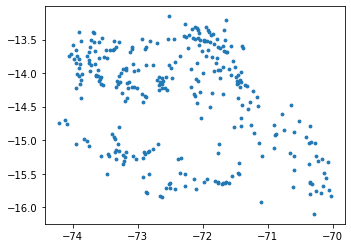

In [452]:
# Simple plot 

capitales.plot(markersize = 8)

## 3.0 Linestring

In [453]:
# Load a shapefile in Python 

mita_boundary = gpd.read_file(r'..\..\data\Mita\MitaBoundary.shp')

In [454]:
mita_boundary 

,FID_in2_po,Id,geometry
0,0,0,"LINESTRING (688884.250 8510730.000, 689044.875..."
1,0,0,"LINESTRING (945641.513 8232696.975, 945635.375..."


<AxesSubplot:>

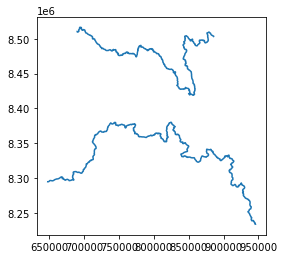

In [455]:
# Plot Mita boundary del estudio 

mita_boundary.plot()

In [456]:
mita_boundary.crs

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 3.0 Merge Geospatial information


In [457]:
# load shapefile a nivel distrital

distritos = gpd.read_file(r'..\..\data\geopandas_data\LIMITE_DISTRITO\LIMITE_DIST.shp')

distritos

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173..."
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2..."
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429..."
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332..."
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318..."
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883..."
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150..."
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."


In [458]:
# Centroide del distrito 

distritos['Point_centroid'] = distritos.geometry.centroid

distritos

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,Point_centroid
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...",POINT (-76.76730 -12.40872)
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",POINT (-76.62958 -12.42969)
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...",POINT (-76.80131 -12.23425)
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332...",POINT (-76.77501 -12.46665)
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559...",POINT (-76.74393 -12.26929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318...",POINT (-81.04351 -4.49884)
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883...",POINT (-80.67446 -4.88929)
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150...",POINT (-80.69650 -5.16143)
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",POINT (-76.03852 -9.20771)


In [459]:
# Supongamos que no tenemos algun identificador de distrito, provincia o algun espacio geopolítico, etc

del capitales['UBIGEO']

In [460]:
capitales

,LAT,LON,NEAR_FID,NEAR_DIST,Point,longitude,latitude
0,-16.099444,-70.282500,1,6.259442e+05,POINT (-70.28250 -16.09944),-70.282500,-16.099444
1,-15.928056,-71.102778,1,7.087384e+05,POINT (-71.10278 -15.92806),-71.102778,-15.928056
2,-15.852500,-72.623889,1,8.531851e+05,POINT (-72.62389 -15.85250),-72.623889,-15.852500
3,-15.837500,-70.021667,1,6.231187e+05,POINT (-70.02167 -15.83750),-70.021667,-15.837500
4,-15.835000,-72.651667,1,8.567653e+05,POINT (-72.65167 -15.83500),-72.651667,-15.835000
...,...,...,...,...,...,...,...
300,-13.319444,-71.955833,1,9.689782e+05,POINT (-71.95583 -13.31944),-71.955833,-13.319444
301,-13.310556,-72.117222,1,9.819171e+05,POINT (-72.11722 -13.31056),-72.117222,-13.310556
302,-13.266667,-72.266667,1,9.968202e+05,POINT (-72.26667 -13.26667),-72.266667,-13.266667
303,-13.210833,-71.646389,1,9.549290e+05,POINT (-71.64639 -13.21083),-71.646389,-13.210833


## 3.1 Join - Contains 

In [461]:
# Merge: el poligono del distrito que contenga (contains) la ciudad capital del distrito ( MITA minera )

merge = gpd.sjoin(distritos, capitales  , how="inner", op="contains")
del merge['index_right']
merge

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,...,Shape_Leng,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude
11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,0.011908,...,0.706331,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833
12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,0.008678,...,0.553690,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111
13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,0.007104,...,0.402704,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167
14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,0.007974,...,0.563448,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667
15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,0.017073,...,0.630832,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,0.002004,...,0.251888,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500


## 3.3 Join - Intersects

In [462]:
# Merge: el poligono del distrito que intersecte (intersects) la ciudad capital del distrito ( MITA minera )

data_geo= gpd.sjoin(distritos, capitales , how="inner", op="intersects").reset_index()
del data_geo['index_right']
data_geo

,index,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,...,Shape_Leng,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude
0,11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,...,0.706331,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833
1,12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,...,0.553690,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111
2,13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,...,0.402704,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167
3,14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,...,0.563448,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667
4,15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,...,0.630832,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,...,0.251888,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333
301,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889
302,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000
303,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500


In [463]:
data_geo['Point_capital'] = gpd.points_from_xy(data_geo.longitude, data_geo.latitude, crs="EPSG:4326" )

In [464]:
data_geo

,index,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,...,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude,Point_capital
0,11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,...,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833,POINT (-73.18500 -13.95583)
1,12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,...,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111,POINT (-73.22500 -13.94611)
2,13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,...,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167,POINT (-73.60667 -13.95417)
3,14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,...,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667,POINT (-73.60667 -14.04667)
4,15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,...,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833,POINT (-73.06250 -13.97083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,...,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333,POINT (-71.82417 -13.56833)
301,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889,POINT (-71.97972 -13.52389)
302,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000,POINT (-71.96000 -13.52000)
303,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500,POINT (-71.97583 -13.51250)


<AxesSubplot:>

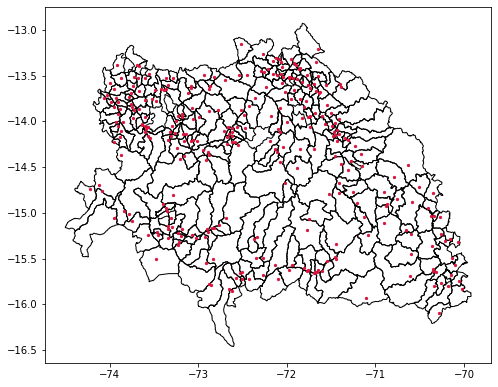

In [472]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

# coordenadas de la ciudad capital del dsitrito 

data_geo['Point_capital'].plot(color = '#DC143C', markersize=5, ax = ax)


<AxesSubplot:>

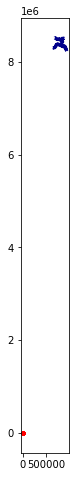

In [337]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

# centroide de cada distrito 

data_geo['Point_centroid'].plot(color = 'r', markersize=10, ax = ax)

# Mita boundary

mita_boundary.plot(color = 'darkblue', linewidth= 3, ax = ax) 

In [338]:
mita_boundary.crs

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [339]:
# Se proyecta al sistema convencional de coordenadas EPSG:4326
# D esta manera sea compatible con los otros mapas 

mita_boundary.to_crs(epsg=4326,inplace=True)

<AxesSubplot:>

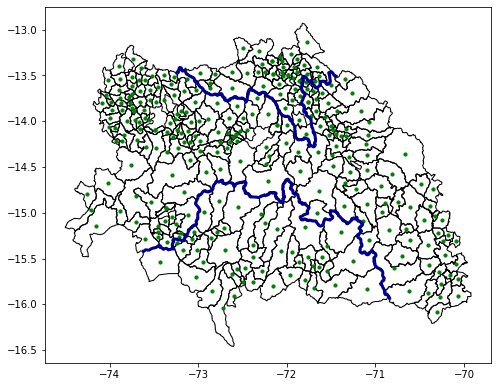

In [340]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

data_geo['Point_centroid'].plot(color = 'green', markersize=10, ax = ax)

mita_boundary.plot(color = 'darkblue', linewidth= 3 , ax = ax) 

## 4.0 Distances 

In [341]:
data_geo

,index,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,...,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude,Point_capital
0,11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,...,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833,POINT (-73.18500 -13.95583)
1,12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,...,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111,POINT (-73.22500 -13.94611)
2,13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,...,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167,POINT (-73.60667 -13.95417)
3,14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,...,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667,POINT (-73.60667 -14.04667)
4,15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,...,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833,POINT (-73.06250 -13.97083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,...,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333,POINT (-71.82417 -13.56833)
301,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889,POINT (-71.97972 -13.52389)
302,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000,POINT (-71.96000 -13.52000)
303,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500,POINT (-71.97583 -13.51250)


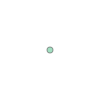

In [342]:
# selección de un point

data_geo.loc[0,"Point_centroid"]

In [343]:
mita_boundary

,FID_in2_po,Id,geometry
0,0,0,"LINESTRING (-73.25512 -13.46537, -73.25364 -13..."
1,0,0,"LINESTRING (-70.83906 -15.94500, -70.83913 -15..."


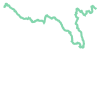

In [344]:
# Plot de uno de los boundaries 

mita_boundary.loc[0,"geometry"] 

In [345]:
print( data_geo.loc[0,"Point_centroid"].distance(mita_boundary.loc[0,"geometry"] ) )

data_geo.loc[0,"Point_centroid"].distance(mita_boundary.loc[1,"geometry"] )

# Se buene observar que la primera capital está cercana al boundary de index = 0
# distance permite hallar la minima distancia geodésica
# Las unidades están en grados

0.3780424516996454


0.7991220422560418

In [346]:
# Coordenadas de Mina Potosi y Huancavelica

potosi = (-65.75495755044265, -19.571598207409757)
huanca = (-74.97525207494975, -12.808993982792076)

point = (data_geo.loc[0,"Point_centroid"].x, data_geo.loc[0,"Point_centroid"].y)

In [347]:
point

(-73.185, -13.95583333)

### Referencia 

[Haversine](https://pypi.org/project/haversine/)

In [348]:
# Haversine distance asume que la tierra es una esfera. A esta medida tambien se llama Great-Circle

print("Distancia en kilometros: ",hs.haversine( huanca , point, unit = 'km'))

print("Distancia en metros: ", hs.haversine( huanca , point, unit = 'm'))

print("Distancia en millas: ", hs.haversine( huanca , point, unit = 'mi'))

Distancia en kilometros:  202.10753203071803
Distancia en metros:  202107.53203071802
Distancia en millas:  125.58379809010545


In [349]:
# Usando geopy (from geopy import distance as )

print("Distancia geodésica (elíptica) en kilometros : ", distance.geodesic(huanca , point).km )

print("Distancia great-circle en kilometros : ", distance.great_circle(huanca , point).km )

Distancia geodésica en kilometros :  202.86294742689847
Distancia great-circle en kilometros :  202.1075383753187


## Referencia de Geopy

[Geo-py](https://pypi.org/project/geopy/)

In [350]:
# longitud de un tramo del MITA boundary 
print(mita_boundary.loc[1,"geometry"].length)

# area

data_geo.loc[0,"geometry"].area

# la unidad de medidas esta en grados (redianes)

6.399277433462688


0.011908123743330926

### 5.0 Proyecciones a un sistema Planar (Distancias Euclideanas)

In [351]:
data_geo.to_crs(epsg=32718, inplace = True) # proyeccion que permite calcular distancias precisas en el Perú 

In [352]:
data_geo

,index,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,...,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude,Point_capital
0,11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,...,0.011908,"POLYGON ((697250.477 8473529.481, 697401.447 8...",POINT (-73.13448 -13.90350),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833,POINT (-73.18500 -13.95583)
1,12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,...,0.008678,"POLYGON ((689847.560 8471979.398, 689929.312 8...",POINT (-73.24545 -13.91588),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111,POINT (-73.22500 -13.94611)
2,13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,...,0.007104,"POLYGON ((647956.212 8461886.167, 648072.733 8...",POINT (-73.60301 -13.96215),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167,POINT (-73.60667 -13.95417)
3,14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,...,0.007974,"POLYGON ((660880.256 8461589.603, 660952.500 8...",POINT (-73.55097 -13.98959),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667,POINT (-73.60667 -14.04667)
4,15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,...,0.017073,"POLYGON ((711440.944 8462311.134, 711543.655 8...",POINT (-73.08678 -14.00781),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833,POINT (-73.06250 -13.97083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,...,0.002004,"POLYGON ((845106.651 8504531.468, 845184.916 8...",POINT (-71.83159 -13.55300),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333,POINT (-71.82417 -13.56833)
301,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (-71.98763 -13.49255),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889,POINT (-71.97972 -13.52389)
302,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (-71.98763 -13.49255),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000,POINT (-71.96000 -13.52000)
303,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (-71.98763 -13.49255),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500,POINT (-71.97583 -13.51250)


In [353]:
data_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           305 non-null    int64   
 1   OBJECTID_1      305 non-null    int64   
 2   CCDD            305 non-null    object  
 3   NOMBDEP         305 non-null    object  
 4   CCPP            305 non-null    object  
 5   NOMBPROV        305 non-null    object  
 6   CCDI            305 non-null    object  
 7   NOMBDIST        305 non-null    object  
 8   UBIGEO          305 non-null    object  
 9   IDPROV          305 non-null    object  
 10  Shape_STAr      305 non-null    float64 
 11  Shape_STLe      305 non-null    float64 
 12  Shape_Leng      305 non-null    float64 
 13  Shape_Area      305 non-null    float64 
 14  geometry        305 non-null    geometry
 15  Point_centroid  305 non-null    geometry
 16  LAT             305 non-null    float64 
 17  LON     

In [357]:
# Indicamos a Point_centroid como la columna geometry principal de la base para su proyección 

data_geo.set_geometry('Point_centroid', inplace = True)
data_geo.to_crs(epsg=32718, inplace = True)  
data_geo

,index,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,...,Shape_Area,geometry,Point_centroid,LAT,LON,NEAR_FID,NEAR_DIST,longitude,latitude,Point_capital
0,11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,...,0.011908,"POLYGON ((697250.477 8473529.481, 697401.447 8...",POINT (701574.035 8462157.740),-13.955833,-73.185000,1,1.020937e+06,-73.185000,-13.955833,POINT (-73.18500 -13.95583)
1,12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,...,0.008678,"POLYGON ((689847.560 8471979.398, 689929.312 8...",POINT (689569.893 8460879.024),-13.946111,-73.225000,1,1.025028e+06,-73.225000,-13.946111,POINT (-73.22500 -13.94611)
2,13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,...,0.007104,"POLYGON ((647956.212 8461886.167, 648072.733 8...",POINT (650899.669 8456015.976),-13.954167,-73.606667,1,1.057532e+06,-73.606667,-13.954167,POINT (-73.60667 -13.95417)
3,14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,...,0.007974,"POLYGON ((660880.256 8461589.603, 660952.500 8...",POINT (656503.948 8452946.480),-14.046667,-73.606667,1,1.051463e+06,-73.606667,-14.046667,POINT (-73.60667 -14.04667)
4,15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,...,0.017073,"POLYGON ((711440.944 8462311.134, 711543.655 8...",POINT (706637.751 8450575.065),-13.970833,-73.062500,1,1.009444e+06,-73.062500,-13.970833,POINT (-73.06250 -13.97083)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,...,0.002004,"POLYGON ((845106.651 8504531.468, 845184.916 8...",POINT (842966.241 8499484.799),-13.568333,-71.824167,1,9.391661e+05,-71.824167,-13.568333,POINT (-71.82417 -13.56833)
301,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (826144.663 8506392.481),-13.523889,-71.979722,1,9.545626e+05,-71.979722,-13.523889,POINT (-71.97972 -13.52389)
302,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (826144.663 8506392.481),-13.520000,-71.960000,1,9.533567e+05,-71.960000,-13.520000,POINT (-71.96000 -13.52000)
303,1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,...,0.008469,"POLYGON ((828999.828 8512207.686, 829131.161 8...",POINT (826144.663 8506392.481),-13.512500,-71.975833,1,9.551608e+05,-71.975833,-13.512500,POINT (-71.97583 -13.51250)


In [358]:
# Proyeccion de la mita  
mita_boundary.to_crs(epsg=32718, inplace=True)
mita_boundary

,FID_in2_po,Id,geometry
0,0,0,"LINESTRING (688884.250 8510730.000, 689044.875..."
1,0,0,"LINESTRING (945641.513 8232696.975, 945635.375..."


In [359]:
print("Distancia minima euclideana en metros al Boundary (metros) : ", data_geo.loc[0,"Point_centroid"].distance(mita_boundary.loc[1,"geometry"] ) )

# Las distancias luego de la proyección están en metros

Distancia minima euclideana en metros al Boundary :  90643.87856186002


In [360]:
# longitud de un contorno de la Mita en kolimetros 

print(mita_boundary.loc[1,"geometry"].length/1000)  # distancia en kilometros del boundary

# area de un dsitrito en kilometros al cuadrado

data_geo.loc[0,"geometry"].area/1000**2  # 142.4 km^2

698.6938671485821


142.42277155133257

## 7.0 Buffers

([], [])

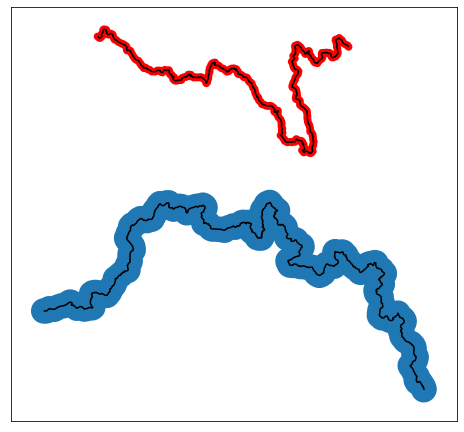

In [361]:
# Buffer de linestring 

f, ax = plt.subplots(1, figsize=(8,8))

base1 = mita_boundary.loc[1,"geometry"].buffer(10000) # Linestring (10 kilometros)
gpd.GeoSeries(base1).plot(ax=ax) # Se convierte a geoseriies para graficarlo

base2 = mita_boundary.loc[0,"geometry"].buffer(3000)  # 3 kilometros a la redonda
gpd.GeoSeries(base2).plot(ax=ax, color = 'red')

mita_boundary.plot(color='black', ax=ax)

plt.xticks([])
plt.yticks([])
